In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, sys.path[0].replace('tests', 'src'))
from polynomial_regression import PolynomialRegressor

In [22]:
data_points = [(1,3), (2,10), (3,40), (4,25), (5,90), (6,100), (7,180), (8,140), (9,250), (10,260)]
x_values = [data_points[i][0] for i in range(len(data_points))]
y_values = [data_points[i][1] for i in range(len(data_points))]

#linear
lin = PolynomialRegressor()
lin.fit(data_points, 1)

#quadratic 
quad = PolynomialRegressor()
quad.fit(data_points, 2)

#seventh_degree
seven = PolynomialRegressor()
seven.fit(data_points, 7)

all_x_values = [i/10 for i in range(0,200)]
lin_y_values = [lin.predict(x) for x in all_x_values]
quad_y_values = [quad.predict(x) for x in all_x_values]
seven_y_values = [seven.predict(x) for x in all_x_values]

(-20.0, 300.0)

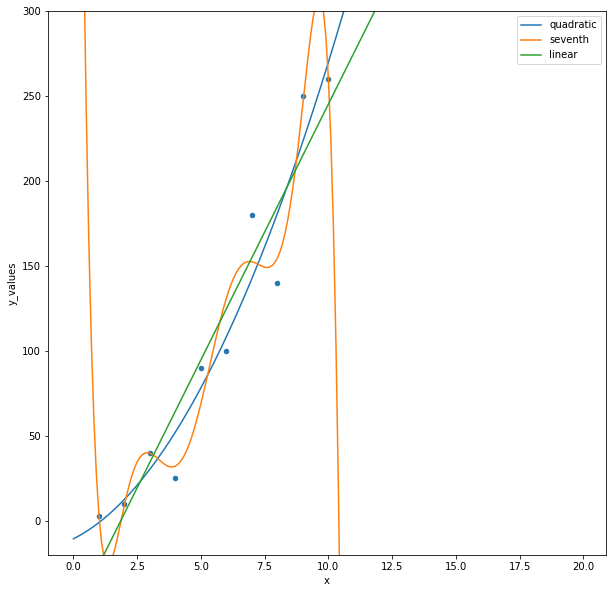

In [23]:

data_df = pd.DataFrame({'x_values': x_values, 'y_values': y_values})

points = pd.DataFrame({'x': all_x_values, 'linear': lin_y_values, 'quadratic': quad_y_values, 'seventh': seven_y_values})

data_points = data_df.plot(x =  'x_values', y = 'y_values', kind='scatter', figsize = (10,10))
quadratic_plot = points.plot(x='x', y='quadratic', ax = data_points)
seventh_degree_plot = points.plot(x='x', y='seventh', ax=quadratic_plot)
points.plot(x = 'x', y='linear', ax=seventh_degree_plot).set_ylim(-20, 300)

<AxesSubplot:>

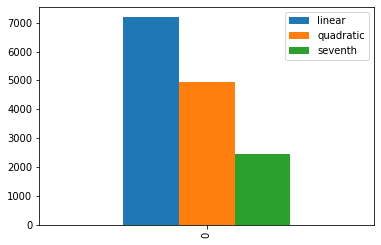

In [11]:
data_points = [(1,3), (2,10), (3,40), (4,25), (5,90), (6,100), (7,180), (8,140), (9,250), (10,260)]
rss = {"linear" : 0, "quadratic" : 0, "seventh" : 0}

for i in range(len(data_points)): 
    current_point = data_points[i]

    lin.fit(data_points, 1)
    rss["linear"] += (lin.predict(current_point[0]) - current_point[1]) ** 2

    quad.fit(data_points, 2)
    rss["quadratic"] += (quad.predict(current_point[0]) - current_point[1]) ** 2

    seven.fit(data_points, 7)
    rss["seventh"] += (seven.predict(current_point[0]) - current_point[1]) ** 2



rss_df = pd.DataFrame(rss, index=[0])
rss_df.plot(kind="bar")


<AxesSubplot:>

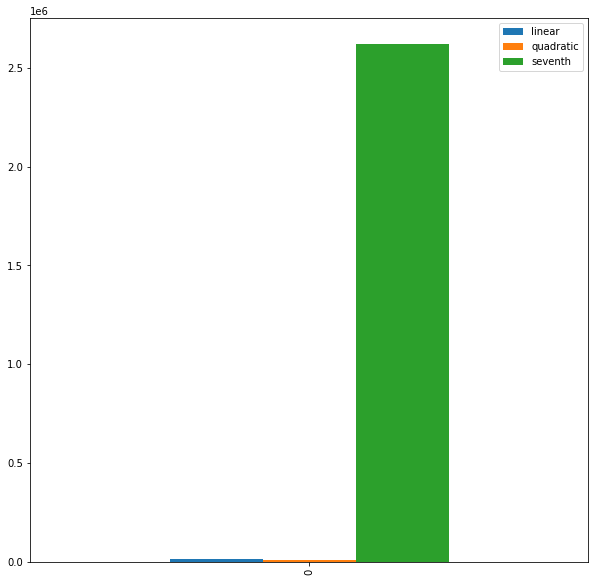

In [12]:
data_points = [(1,3), (2,10), (3,40), (4,25), (5,90), (6,100), (7,180), (8,140), (9,250), (10,260)]
rss_validation = {"linear" : 0, "quadratic" : 0, "seventh" : 0}

for i in range(len(data_points)): 
    current_point = data_points[i]
    data_points.pop(i)

    lin.fit(data_points, 1)
    rss_validation["linear"] += (lin.predict(current_point[0]) - current_point[1]) ** 2

    quad.fit(data_points, 2)
    rss_validation["quadratic"] += (quad.predict(current_point[0]) - current_point[1]) ** 2

    seven.fit(data_points, 7)
    rss_validation["seventh"] += (seven.predict(current_point[0]) - current_point[1]) ** 2

    data_points.insert(i, current_point)

    
rss_validation_df = pd.DataFrame(rss_validation, index=[0])
rss_validation_df.plot(kind='bar', figsize=(10, 10))
    